In [58]:
!pip install pandas scikit-learn nltk 

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [60]:
file_path = 'News_Category_Dataset_v3.json'
df2 = pd.read_json("News_Category_Dataset_v3.json", lines=True)
df2['text'] = df2['headline'] + " " + df2['short_description']
df2 = df2[['category', 'text']]

In [61]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

df2['processed_text'] = df2['text'].apply(preprocess_text)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df2['processed_text'], df2['category'], test_size=0.6)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', MultinomialNB()),
])

In [63]:
print("Training the model...")
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

print("Making predictions...")
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Training the model...
Training completed in 2.43 seconds (0.04 minutes)
Making predictions...
Accuracy: 0.4927

Classification Report:
                precision    recall  f1-score   support

          ARTS       0.56      0.02      0.03       912
ARTS & CULTURE       1.00      0.00      0.01       807
  BLACK VOICES       0.59      0.08      0.13      2733
      BUSINESS       0.50      0.25      0.33      3574
       COLLEGE       0.71      0.01      0.01       699
        COMEDY       0.66      0.19      0.30      3267
         CRIME       0.53      0.42      0.47      2139
CULTURE & ARTS       0.50      0.00      0.00       643
       DIVORCE       0.90      0.40      0.56      2073
     EDUCATION       0.50      0.00      0.00       629
 ENTERTAINMENT       0.44      0.76      0.55     10400
   ENVIRONMENT       1.00      0.03      0.06       890
         FIFTY       1.00      0.00      0.00       842
  FOOD & DRINK       0.58      0.67      0.62      3799
     GOOD NEWS       0.8

Confusion Matrix:



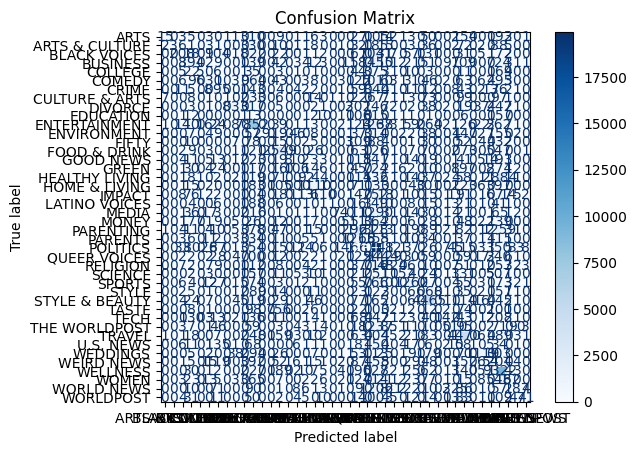

In [65]:
print("Confusion Matrix:\n")

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap='Blues', display_labels=pipeline.classes_)

plt.title('Confusion Matrix')
plt.show()